# Table of Content
<font size='3'>

1. Project Description

2. The dataset 

3. Time Analysis 

4. Time Analysis (Day and Night) 

5. Analysis of Incident Characteristics

6. Recommendations

# Project Description

<font size='3'>The department of transport are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. This project analyzes road accidents [dataset](https://data.gov.uk/dataset/road-accidents-safety-data) published by the department of transport UK.

<font size='3'>The aim of this project is to analyse the characteristics of these major incidents and recommend areas of focus for the safety team to brainstorm interventions that could lower the number of deaths.

# The Dataset

In [1]:
#importing required modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the dataset in a dataframe
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2.02001E+12,2020,10219808,-0.254001,51.462262,3,1,1,4/2/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2.02001E+12,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2.02001E+12,2020,10228005,-0.178719,51.529614,3,1,1,1/1/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2.02001E+12,2020,10228006,-0.001683,51.541210,2,1,1,1/1/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2.02001E+12,2020,10228011,-0.137592,51.515704,3,1,2,1/1/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [3]:
#loading the lookup table dataset into a dataframe
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head()

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known


In [4]:
#missing value count
accidents.isnull().sum()

accident_index                              0
accident_year                               0
accident_reference                          0
longitude                                  14
latitude                                   14
accident_severity                           0
number_of_vehicles                          0
number_of_casualties                        0
date                                        0
day_of_week                                 0
time                                        0
first_road_class                            0
first_road_number                           0
road_type                                   0
speed_limit                                 0
junction_detail                             0
junction_control                            0
second_road_class                           0
second_road_number                          0
pedestrian_crossing_human_control           0
pedestrian_crossing_physical_facilities     0
light_conditions                  

In [5]:
#drop missing values
accidents = accidents.dropna()
accidents.isnull().sum()

accident_index                             0
accident_year                              0
accident_reference                         0
longitude                                  0
latitude                                   0
accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
date                                       0
day_of_week                                0
time                                       0
first_road_class                           0
first_road_number                          0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
second_road_class                          0
second_road_number                         0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_co

In [6]:
column_names = ['junction_control','day_of_week','special_conditions_at_site', 'urban_or_rural_area','pedestrian_crossing_physical_facilities',
'pedestrian_crossing_human_control','road_type','junction_detail','carriageway_hazards','second_road_class','first_road_class','road_surface_conditions',
'light_conditions','weather_conditions']
#map_cols(['special_conditions_at_site', 'urban_or_rural_area'])
len(column_names)

14

In [7]:
#function to map codes to values from lookup table

def map_cols(col_names):
    map_df = lookup[['field name','code/format', 'label']]
    map_df.set_index('field name', inplace=True)
    for col in col_names:
        #extract each required column as a seperate dataframe of corresponding codes
       temp_df = map_df.loc[col][['code/format','label']]
       temp_df = temp_df.astype({'code/format': 'int32'})
       #create dictionary map from code and label 
       col_dict = dict(zip(temp_df['code/format'], temp_df.label))
       accidents[col] = accidents[col].map(col_dict)
    

In [8]:
#map_cols function call
map_cols(column_names)

In [9]:
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2.02001E+12,2020,10219808,-0.254001,51.462262,3,1,1,4/2/2020,Tuesday,...,Unclassified,0,unknown (self reported),unknown (self reported),Daylight,Unknown,unknown (self reported),None,None,Urban
1,2.02001E+12,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,Monday,...,Unclassified,0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None,Urban
2,2.02001E+12,2020,10228005,-0.178719,51.529614,3,1,1,1/1/2020,Wednesday,...,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban
3,2.02001E+12,2020,10228006,-0.001683,51.541210,2,1,1,1/1/2020,Wednesday,...,Unclassified,0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Fine no high winds,Dry,None,None,Urban
4,2.02001E+12,2020,10228011,-0.137592,51.515704,3,1,2,1/1/2020,Wednesday,...,C,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban


In [15]:
#extracting major incident
major_incidents = accidents.copy()[((accidents['accident_severity'] == 1) & (accidents['number_of_casualties'] >= 3))]
major_incidents.describe()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,first_road_number,speed_limit,second_road_number
count,202.0,202.000000,202.000000,202.0,202.000000,202.000000,202.000000,202.000000,202.000000
mean,2020.0,-1.456909,52.822646,1.0,2.361386,3.727723,976.569307,51.485149,158.094059
std,0.0,1.531212,1.597268,0.0,1.227015,1.529193,1814.370167,13.849665,941.257461
min,2020.0,-5.660176,50.290974,1.0,1.000000,3.000000,0.000000,20.000000,0.000000
25%,2020.0,-2.260795,51.630392,1.0,2.000000,3.000000,16.000000,40.000000,0.000000
50%,2020.0,-1.426011,52.614902,1.0,2.000000,3.000000,141.500000,60.000000,0.000000
75%,2020.0,-0.345738,53.562637,1.0,3.000000,4.000000,663.000000,60.000000,0.000000
max,2020.0,1.664742,58.593227,1.0,8.000000,19.000000,8024.000000,70.000000,9011.000000


In [16]:
#inspecting data types
major_incidents.dtypes

accident_index                              object
accident_year                                int64
accident_reference                          object
longitude                                  float64
latitude                                   float64
accident_severity                            int64
number_of_vehicles                           int64
number_of_casualties                         int64
date                                        object
day_of_week                                 object
time                                        object
first_road_class                            object
first_road_number                            int64
road_type                                   object
speed_limit                                  int64
junction_detail                             object
junction_control                            object
second_road_class                           object
second_road_number                           int64
pedestrian_crossing_human_contr

# Time Analysis

<font size='3'>We start off by analysing the general occurance of major incidents by days of the week and time of the day.

In [17]:
#join date and time column to create date_time column
major_incidents['date_time'] = major_incidents[['date', 'time']].agg(' '.join, axis=1)

#create datetime object
major_incidents['date_time'] = pd.to_datetime(major_incidents['date_time'])

In [18]:
#group data by time (hourly)
times = pd.DatetimeIndex(major_incidents.date_time)
grouped = major_incidents.groupby(times.hour)

#count incidents
time_values = grouped.count()['date_time'].sort_index(ascending = True)
time_values

date_time
0      4
1      5
2      4
3      6
4      5
5      8
6      4
7      3
8      6
9      4
10    10
11     7
12     9
13    10
14    12
15    13
16    11
17    16
18    17
19     5
20    12
21    12
22    15
23     4
Name: date_time, dtype: int64

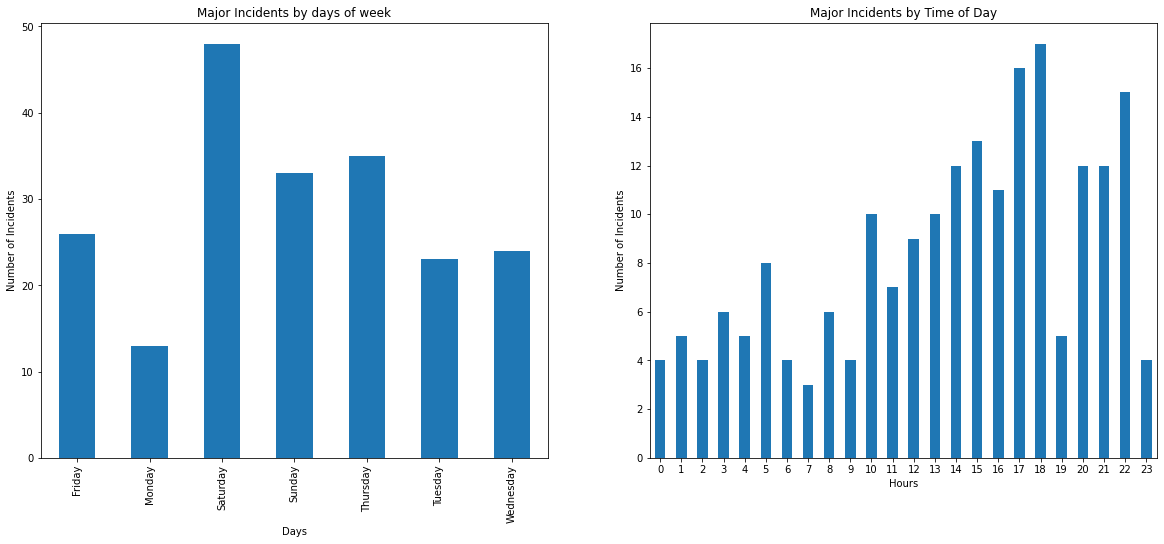

In [19]:
plt.figure(figsize=(20,8))

#plot of major incidents by day of week
plt.subplot(1,2,1)
major_incidents['day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title('Major Incidents by days of week')
plt.xlabel('Days')
#plt.xticks(range(len(labels)), labels, rotation = 45)
plt.ylabel('Number of Incidents')

#plot of major incidents by time of day
plt.subplot(1,2,2)
time_values.plot(kind='bar')
plt.title('Major Incidents by Time of Day')
plt.xlabel('Hours')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Number of Incidents')

plt.show()

<font size='3'><font color = red > **We can see that most major incidents occured on Saturday, with a total of 48 incidents and that the highest number of major incidents was recorded between 17:00 hours and 18:59 hours.**

# Time Analysis (Day and Night )
 
<font size='3'>**Dividing the major icidents into day and night, we can understand at what period that most accidents occur.** <br>
**Day: 7am - 6pm <br>
  Night: 6pm - 7am**
  
<font size='3'>***Note that this is not perfect split of day and night but it is used for analysis purpose.***

In [20]:
#dividing data into day and night dataframes
day = major_incidents.copy()[major_incidents['date_time'].dt.hour.between(7,18)]
night = major_incidents.copy()[~(major_incidents['date_time'].dt.hour.between(7,18))]

print(day.shape)
print(night.shape)
print(day['date_time'].dt.hour.unique())
print(night['date_time'].dt.hour.unique())

(118, 28)
(84, 28)
[13 12 14 10 18  9  7 15 16 17 11  8]
[ 5 22  3  6 23 21  0  2  4 20  1 19]


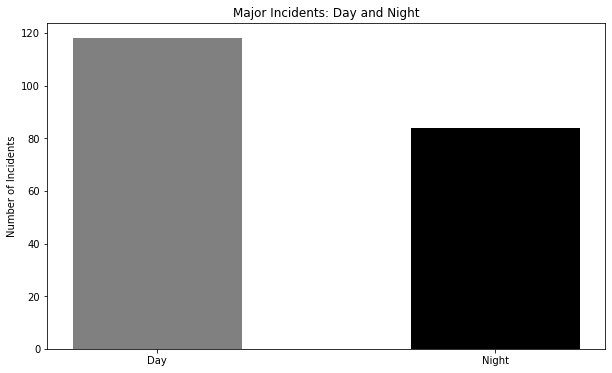

In [21]:
y = [118, 84]
x = ['Day', 'Night']

#plot of incidents count by day and night
plt.figure(figsize=(10,6))
plt.bar(x,y, width=0.5, color=['grey', 'black'])
plt.title('Major Incidents: Day and Night')
plt.ylabel('Number of Incidents')
plt.show()

<font size='3'><font color = red>**We have more major incidents ocurring in the day time than at night.**

<font size='3'><font color = white>**Lets further investigate what days of the week and at what time do these incidents occur.**


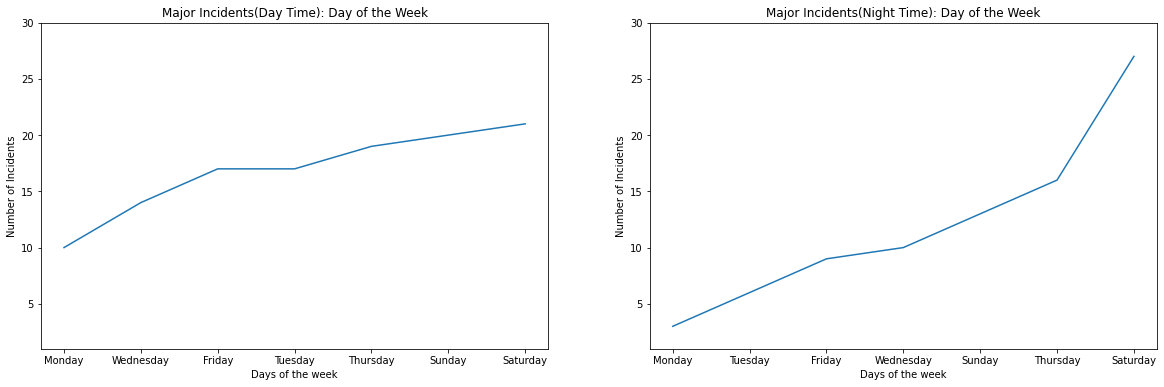

In [22]:
#grouping day and night by days of the week
by_dayofweek = day.groupby('day_of_week').count()
by_dayofweek_night = night.groupby('day_of_week').count()

#labels = [0,'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

#plot of day time incidents by days of the week
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
by_dayofweek['date'].sort_values().plot.line()
plt.title('Major Incidents(Day Time): Day of the Week')
plt.ylim(1,30)
plt.ylabel('Number of Incidents')
plt.xlabel('Days of the week')
#plt.xticks(range(len(labels)), labels, rotation = 45)

#plot of night time incidents by days of the week
plt.subplot(1,2,2)
by_dayofweek_night['date'].sort_values().plot.line()
plt.title('Major Incidents(Night Time): Day of the Week')
plt.ylim(1,30)
plt.ylabel('Number of Incidents')
plt.xlabel('Days of the week')
#plt.xticks(range(len(labels)), labels, rotation = 45)

plt.show()

<font size='3'><font color=red>**We see that most major incidents were recorded on weekends (Saturday and Sunday) during the day time and at night time Saturday also has the highest record.** <br>
**This could be attributed to people going on weekend vacation or road trips and as such, having more vehicles than usual on the road.**

<font size='3'><font color = white>**Further investigation into the incidents by work days and weekends would give more insight to possible causes of these incidents.**

In [23]:
day['hour'] = day['date_time'].dt.hour #extarct the time part of the datetime

#spliting day data into work days and weekend
bussiness_days = day.copy()[(day['day_of_week'] != 'Saturday') & (day['day_of_week'] != 'Sunday')]
weekend = day.copy()[~((day['day_of_week'] != 'Saturday') & (day['day_of_week'] != 'Sunday'))]

#group by hours and get the incident count per hour
by_hour_business = bussiness_days.groupby('hour').count()
by_hour_weekend = weekend.groupby('hour').count()

by_hour_business['date'].sort_index()

hour
7      3
8      5
9      4
10     6
11     5
12     6
13     7
14     5
15    10
16     7
17     9
18    10
Name: date, dtype: int64

In [24]:
night['hour'] = night['date_time'].dt.hour

#spliting night data into work days and weekend
bussiness_days = night.copy()[(night['day_of_week'] != 'Saturday') & (night['day_of_week'] != 'Sunday')]
weekend = night.copy()[~((night['day_of_week'] != 'Saturday') & (night['day_of_week'] != 'Sunday'))]

#group by hours and get the incident count per hour
by_hour_business_night = bussiness_days.groupby('hour').count()
by_hour_weekend_night = weekend.groupby('hour').count()

by_hour_business_night['date'].sort_index()

hour
0     3
1     2
2     2
3     3
4     2
5     5
6     1
19    4
20    7
21    5
22    8
23    2
Name: date, dtype: int64

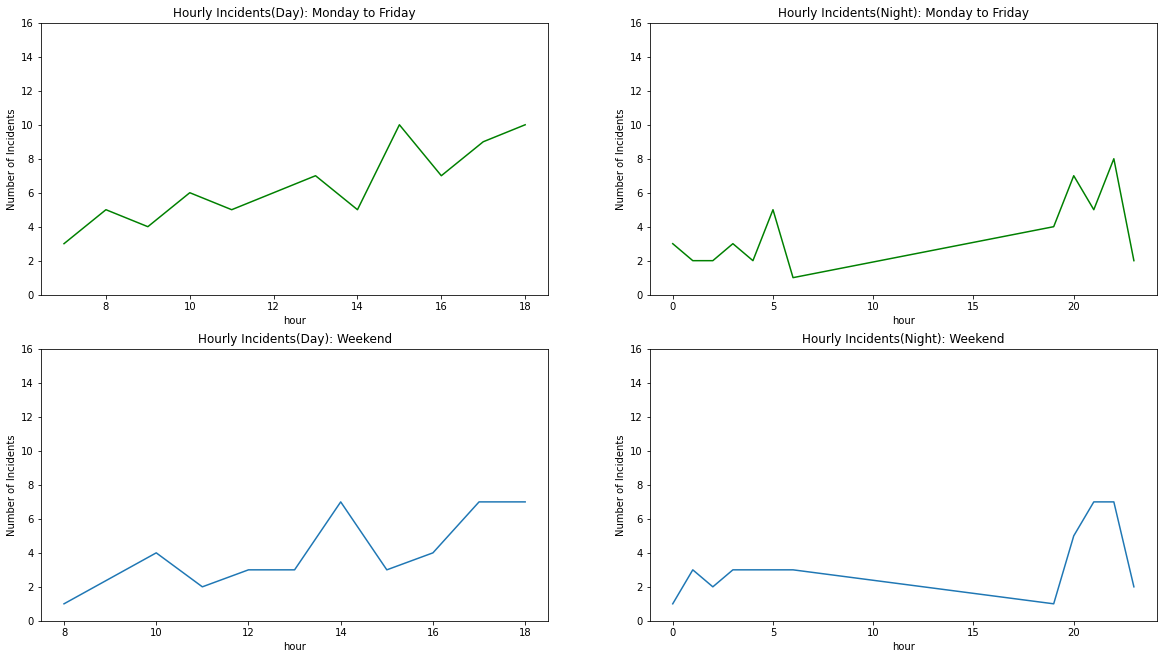

In [25]:
plt.figure(figsize=(20,11))

#plot of hourly business days incidents in the day
plt.subplot(2,2,1)
by_hour_business['date'].plot.line(color='g')
plt.ylim(0,16)
plt.title('Hourly Incidents(Day): Monday to Friday')
plt.ylabel('Number of Incidents')

#plot of business days incidents at night 
plt.subplot(2,2,2)
by_hour_business_night['date'].plot.line(color='g')
plt.ylim(0,16)
plt.title('Hourly Incidents(Night): Monday to Friday')
plt.ylabel('Number of Incidents')

#plot of hourly weekend incidents in the day
plt.subplot(2,2,3)
by_hour_weekend['date'].plot.line()
plt.ylim(0,16)
plt.title('Hourly Incidents(Day): Weekend')
plt.ylabel('Number of Incidents')

#plot of weekend incdents at night
plt.subplot(2,2,4)
by_hour_weekend_night['date'].plot.line()
plt.ylim(0,16)
plt.title('Hourly Incidents(Night): Weekend')
plt.ylabel('Number of Incidents')

plt.show()

<font size='3'><font color=red>**1. A It can be seen that majority of the day-time incidents recorded on work days occurred between 15:00 and 18:00 hours. This is closing time rush hour and it could be a casue.**<br>

<font size='3'>**2. A pattern is also seen that both work days and weekends record high number of incidents between 20:00 and 23:00. This is possibly a result of low visibility.**

# Analysis of Incident Characteristics

<font size='3'>After looking at the potential time related causes of major incidents, we would go further to look into the different characteristics associated with the accidents and see how they compare for major incidents and the other incidents.

In [26]:
#getting the other incidents data
minor_incidents = accidents.copy()[~((accidents['accident_severity'] == 1) & (accidents['number_of_casualties'] >= 3))]
minor_incidents.describe()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,first_road_number,speed_limit,second_road_number
count,90983.0,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000
mean,2020.0,-1.188664,52.350026,2.772144,1.834090,1.261928,790.017729,36.234769,220.317708
std,0.0,1.367353,1.326737,0.449529,0.675138,0.668466,1580.002808,13.877239,913.556360
min,2020.0,-7.497375,49.970479,1.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000
25%,2020.0,-2.107112,51.457189,3.000000,1.000000,1.000000,0.000000,30.000000,0.000000
50%,2020.0,-1.044820,51.761278,3.000000,2.000000,1.000000,33.000000,30.000000,0.000000
75%,2020.0,-0.125194,53.295858,3.000000,2.000000,1.000000,537.000000,40.000000,0.000000
max,2020.0,1.756257,60.541144,3.000000,13.000000,41.000000,9174.000000,70.000000,9174.000000


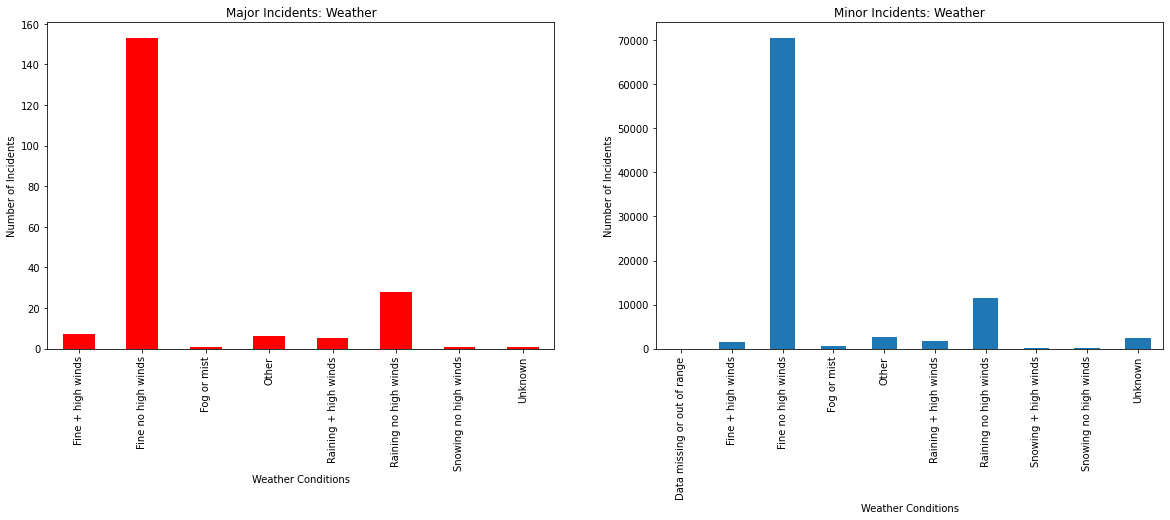

In [27]:
#mapping values from lookup table


#plot of major incidents by weather conditions
plt.subplot(1,2,1)
major_incidents['weather_conditions'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color = 'red')
plt.title('Major Incidents: Weather')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Incidents')

#plot of minor incidents by weather conditions
plt.subplot(1,2,2)
minor_incidents['weather_conditions'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Weather')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Incidents')

plt.show()

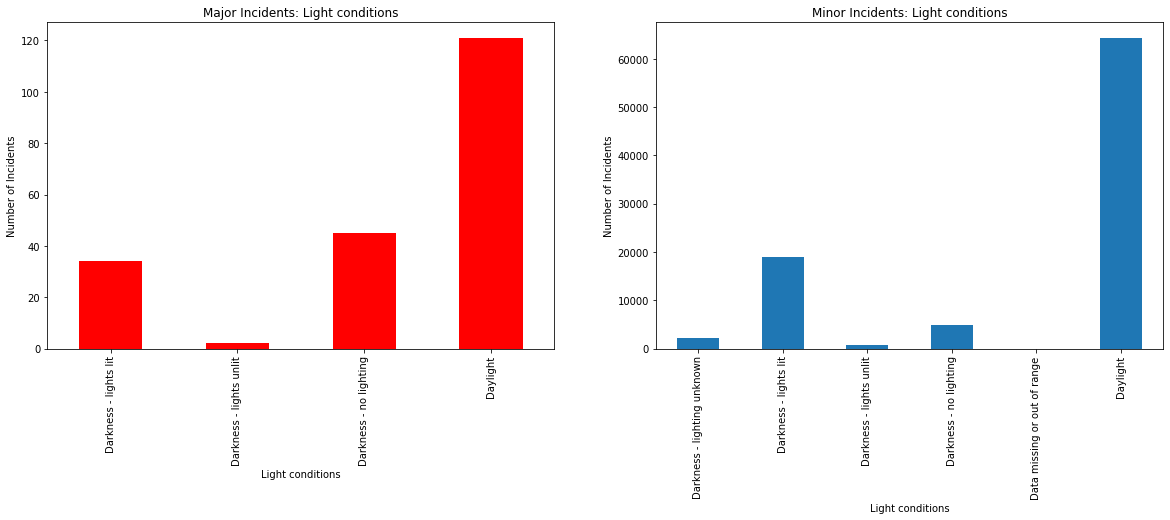

In [28]:
#plot of major incidents by light conditions
plt.subplot(1,2,1)
major_incidents['light_conditions'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: Light conditions')
plt.xlabel('Light conditions')
plt.ylabel('Number of Incidents')

#plot of minor incidents by light conditions
plt.subplot(1,2,2)
minor_incidents['light_conditions'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Light conditions')
plt.xlabel('Light conditions')
plt.ylabel('Number of Incidents')
plt.show()

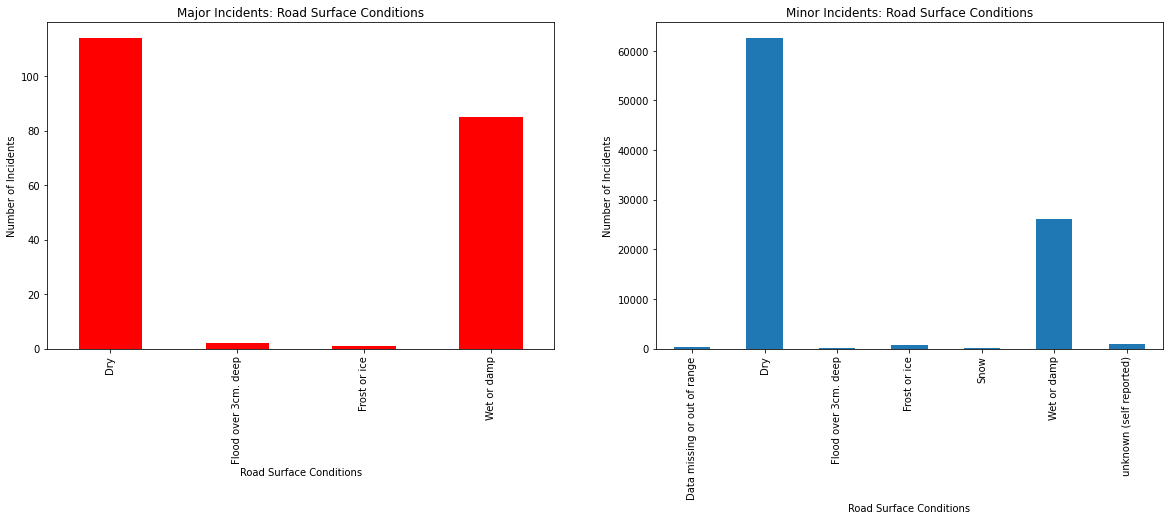

In [29]:
#plot of major incidents by road surface conditions
plt.subplot(1,2,1)
major_incidents['road_surface_conditions'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Incidents')

#plot of minor incidents by road surface conditions
plt.subplot(1,2,2)
minor_incidents['road_surface_conditions'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Incidents')


plt.show()

<font size='3'><font color=red>**More accidents are recorded in good weather and light conditions which seems wrong. These conditions promote more movement on the roads and research has show that it gives and increased sense of confidence on the road to drivers as opposed to bad conditions where the natural reaction is to slow down and take care while driving.**

<font size='3'>**The same can be seen for road surface conditions,** ***the better the conditon, the hgher the number of incidents.***

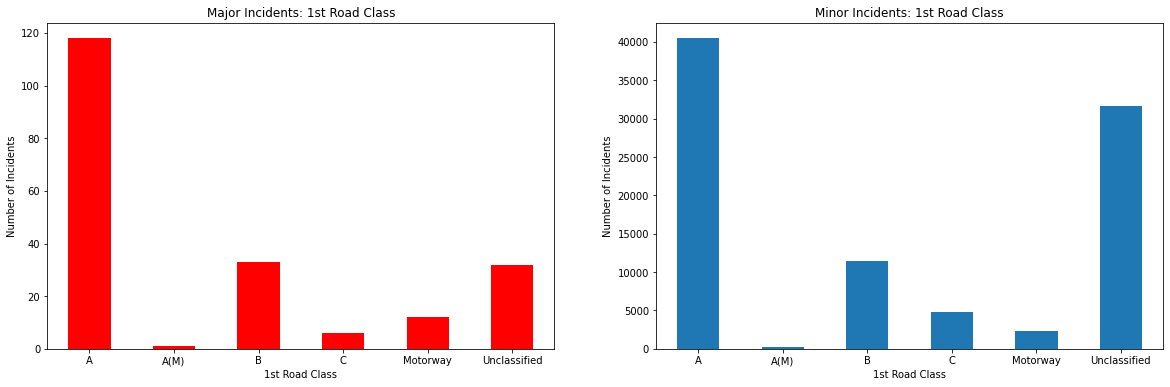

In [30]:
#plot of major incidents by 1st road class
plt.subplot(1,2,1)
major_incidents['first_road_class'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: 1st Road Class')
plt.xlabel('1st Road Class')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)

#plot of minor incidents by 1st road class
plt.subplot(1,2,2)
minor_incidents['first_road_class'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: 1st Road Class')
plt.xlabel('1st Road Class')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)


plt.show()

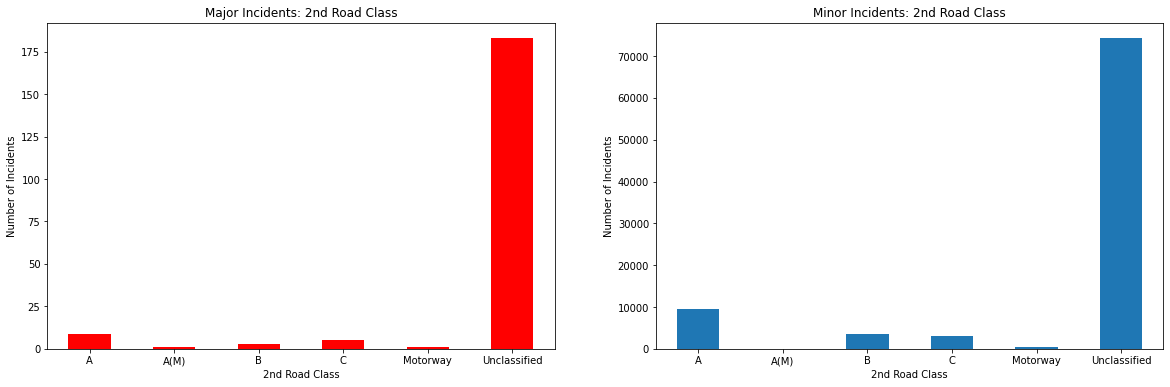

In [31]:
#plot of major incidents by 2nd road class
plt.subplot(1,2,1)
major_incidents['second_road_class'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: 2nd Road Class')
plt.xlabel('2nd Road Class')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)

#plot of minor incidents by 2nd road class
plt.subplot(1,2,2)
minor_incidents['second_road_class'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: 2nd Road Class')
plt.xlabel('2nd Road Class')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)

plt.show()

<font size='3'><font color='red'> **We see that for 1st road class, A and unclassified roads stand out as having higher percentge of the incidents and for 2nd road class, unclassified roads have majority of the incidents.**

<font size='3'>**A-roads are the major through-routes, forming the basic network of main roads and arteries. B-roads are a lower class of road, often of a poorer physical standard, and forming links within the framework of A-roads. They often serve smaller settlements or form less important through routes within urban areas. A roads have more incidents possibly as result of the large traffic.**

<font size='3'>**Unclassified roads are the minor roads that are left over - country lanes and city streets. These roads are in the rural areas.**

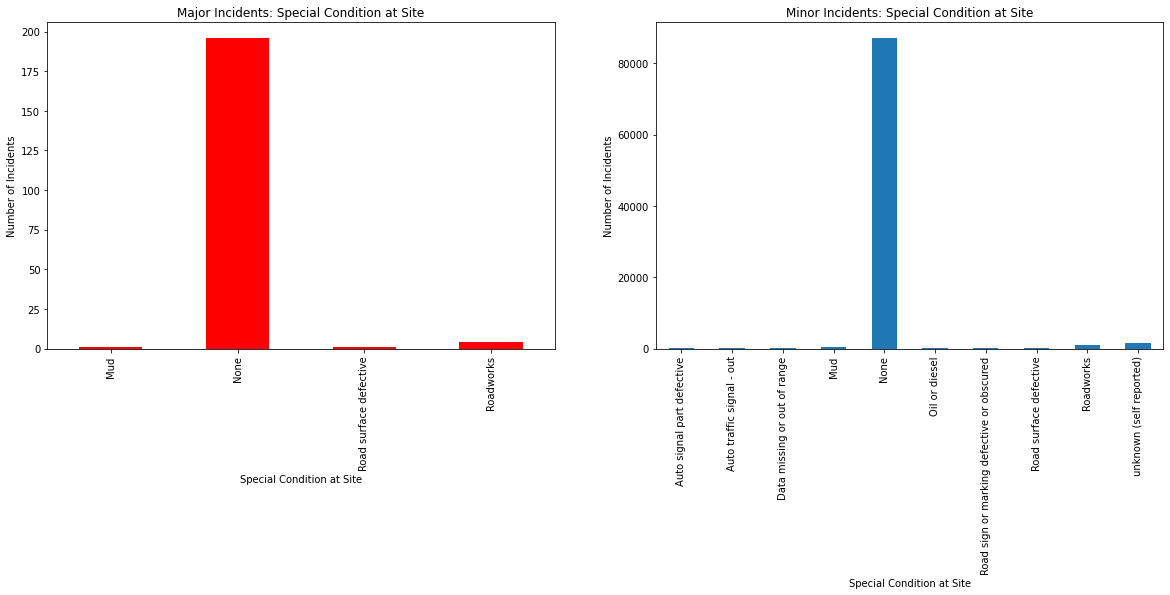

In [32]:
#plot of major incidents by special conditions at the site
plt.subplot(1,2,1)
major_incidents['special_conditions_at_site'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: Special Condition at Site')
plt.xlabel('Special Condition at Site')
plt.ylabel('Number of Incidents')

#plot of minor incidents by special conditions at the site
plt.subplot(1,2,2)
minor_incidents['special_conditions_at_site'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Special Condition at Site')
plt.xlabel('Special Condition at Site')
plt.ylabel('Number of Incidents')

plt.show()

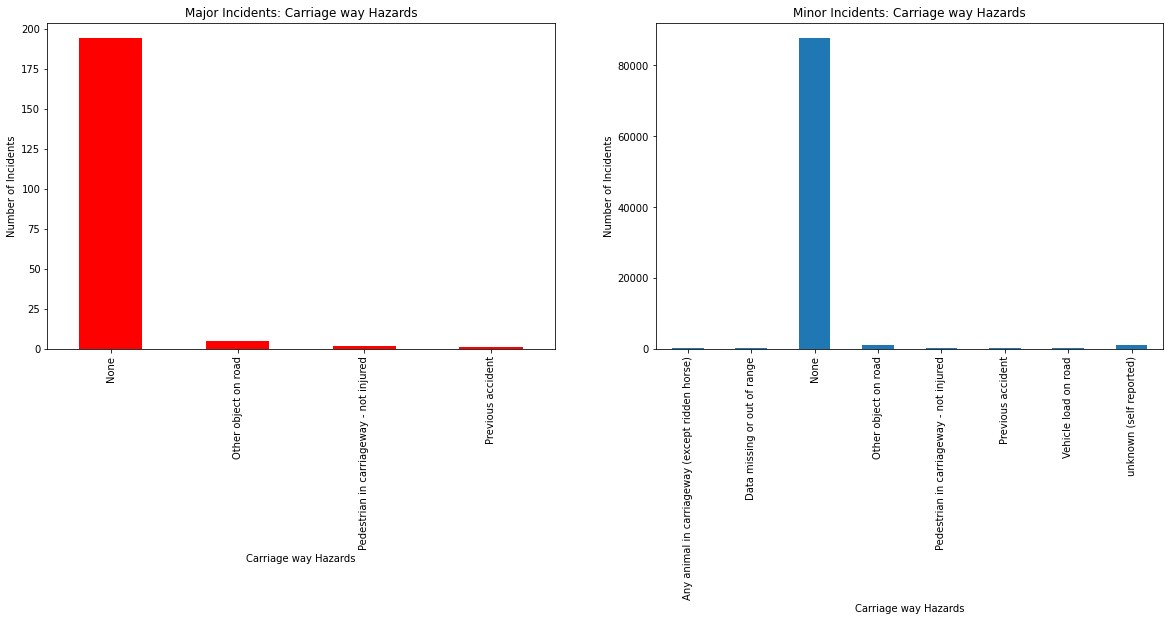

In [33]:
#plot of major incidents by carriage way hazards
plt.subplot(1,2,1)
major_incidents['carriageway_hazards'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: Carriage way Hazards')
plt.xlabel('Carriage way Hazards')
plt.ylabel('Number of Incidents')

#plot of minor incidents by carriage way hazards
plt.subplot(1,2,2)
minor_incidents['carriageway_hazards'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Carriage way Hazards')
plt.xlabel('Carriage way Hazards')
plt.ylabel('Number of Incidents')

plt.show()

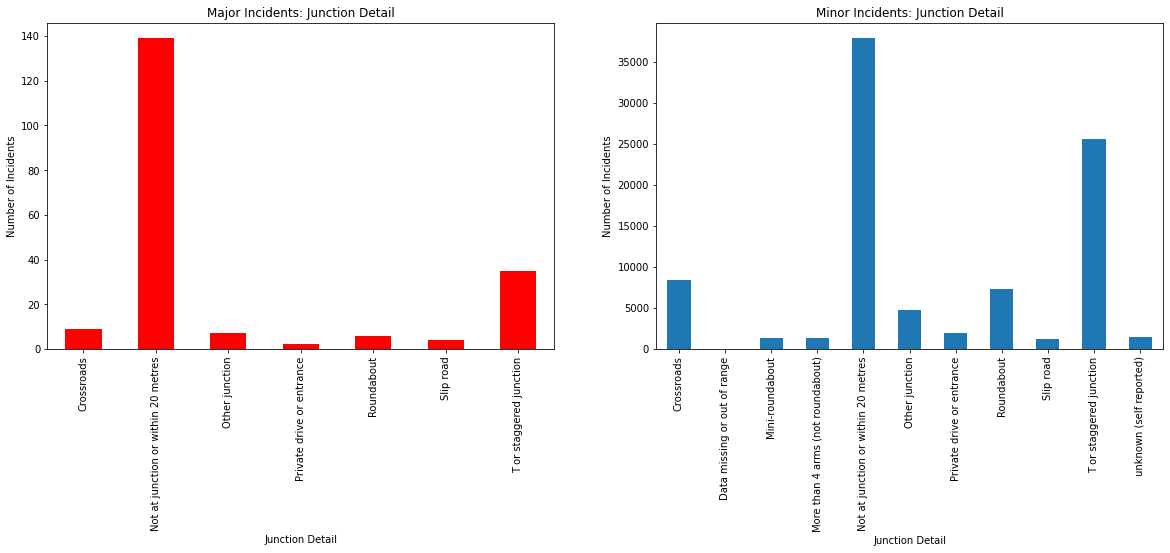

In [34]:
#plot of major incidents by junction detail
plt.subplot(1,2,1)
major_incidents['junction_detail'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: Junction Detail')
plt.xlabel('Junction Detail')
plt.ylabel('Number of Incidents')

#plot of minor incidents by junction detail
plt.subplot(1,2,2)
minor_incidents['junction_detail'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Junction Detail')
plt.xlabel('Junction Detail')
plt.ylabel('Number of Incidents')

plt.show()

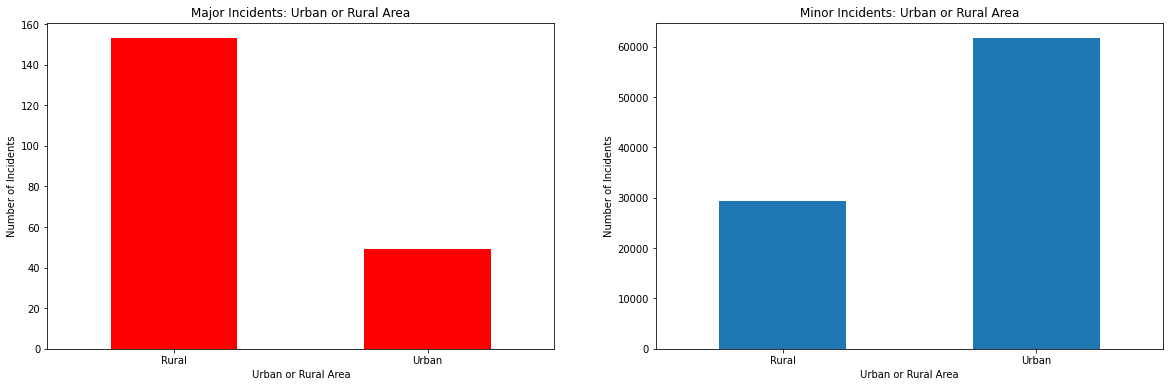

In [35]:
#plot of major incidents by settlement area
plt.subplot(1,2,1)
major_incidents['urban_or_rural_area'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: Urban or Rural Area')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Number of Incidents')
plt.xticks(rotation = 0)

#plot of minor incidents by settlement area
plt.subplot(1,2,2)
minor_incidents['urban_or_rural_area'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Urban or Rural Area')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Number of Incidents')
plt.xticks(rotation = 0)

plt.show()

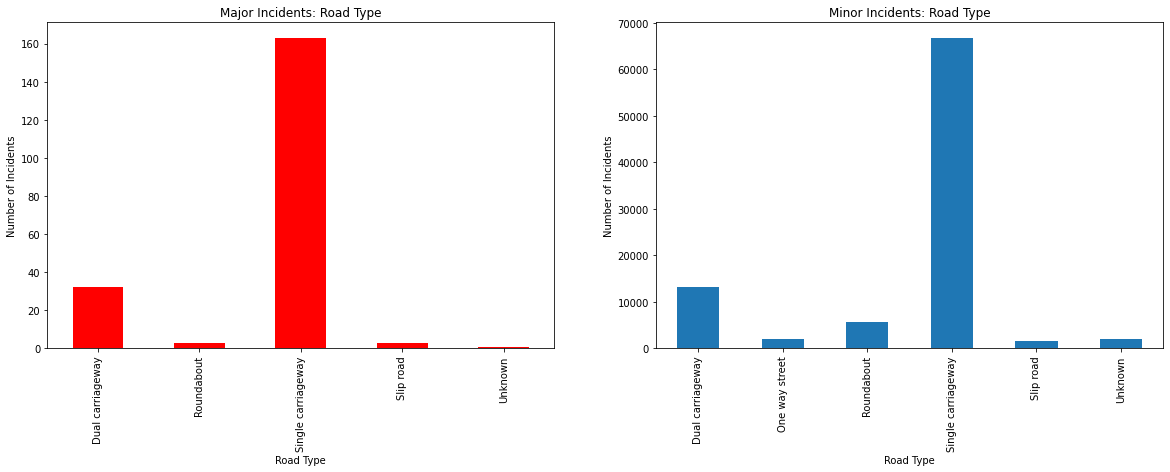

In [36]:
#plot of major incidents by road type
plt.subplot(1,2,1)
major_incidents['road_type'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Incidents')

#plot of minor incidents by road type
plt.subplot(1,2,2)
minor_incidents['road_type'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Incidents')

plt.show()

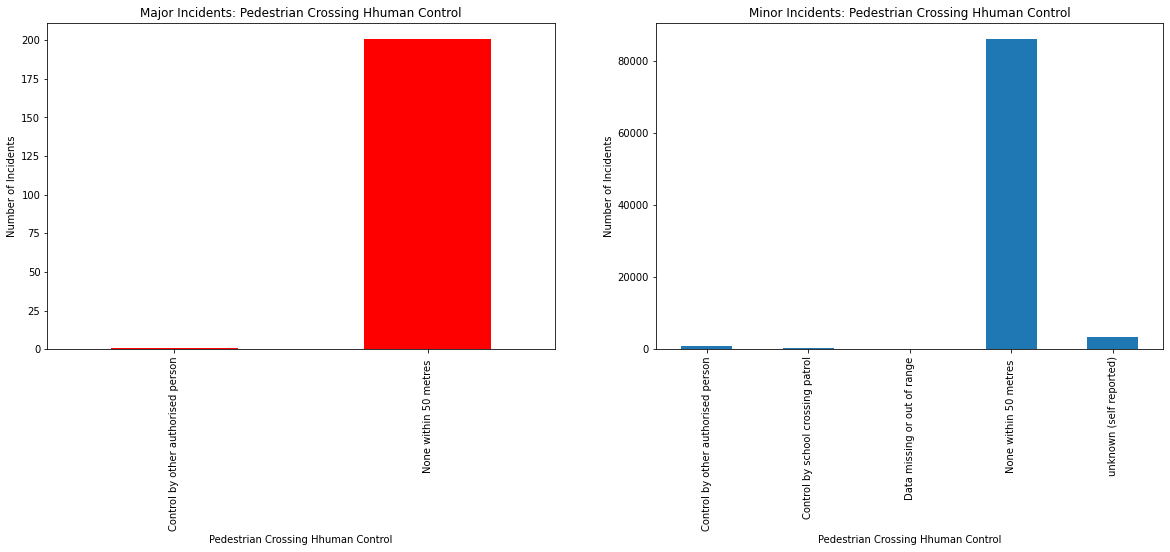

In [37]:
#plot of major incidents by pedestrian crossing (human control)
plt.subplot(1,2,1)
major_incidents['pedestrian_crossing_human_control'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: Pedestrian Crossing Hhuman Control')
plt.xlabel('Pedestrian Crossing Hhuman Control')
plt.ylabel('Number of Incidents')

#plot of minor incidents by pedestrian crossing (human control)
plt.subplot(1,2,2)
minor_incidents['pedestrian_crossing_human_control'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Pedestrian Crossing Hhuman Control')
plt.xlabel('Pedestrian Crossing Hhuman Control')
plt.ylabel('Number of Incidents')

plt.show()

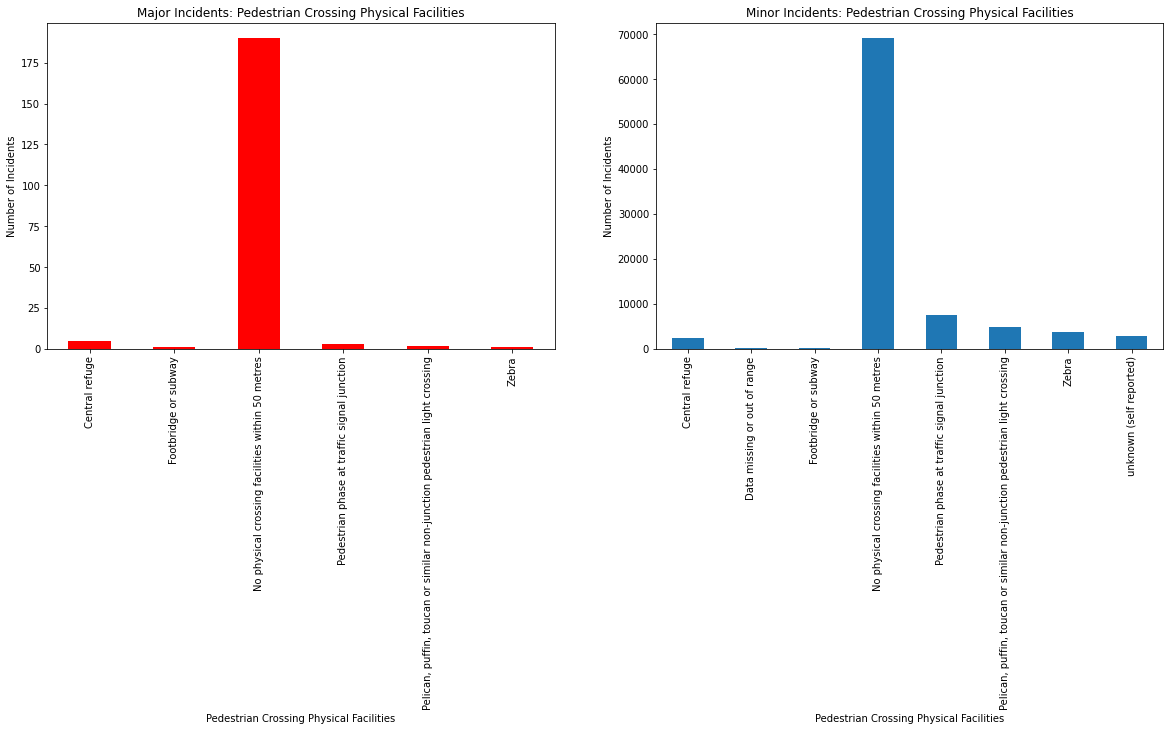

In [38]:
#plot of major incidents by pedestrian crossing (physical facilities)
plt.subplot(1,2,1)
major_incidents['pedestrian_crossing_physical_facilities'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: Pedestrian Crossing Physical Facilities')
plt.xlabel('Pedestrian Crossing Physical Facilities')
plt.ylabel('Number of Incidents')

#plot of minor incidents by pedestrian crossing (physical facilities)
plt.subplot(1,2,2)
minor_incidents['pedestrian_crossing_physical_facilities'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Pedestrian Crossing Physical Facilities')
plt.xlabel('Pedestrian Crossing Physical Facilities')
plt.ylabel('Number of Incidents')

plt.show()

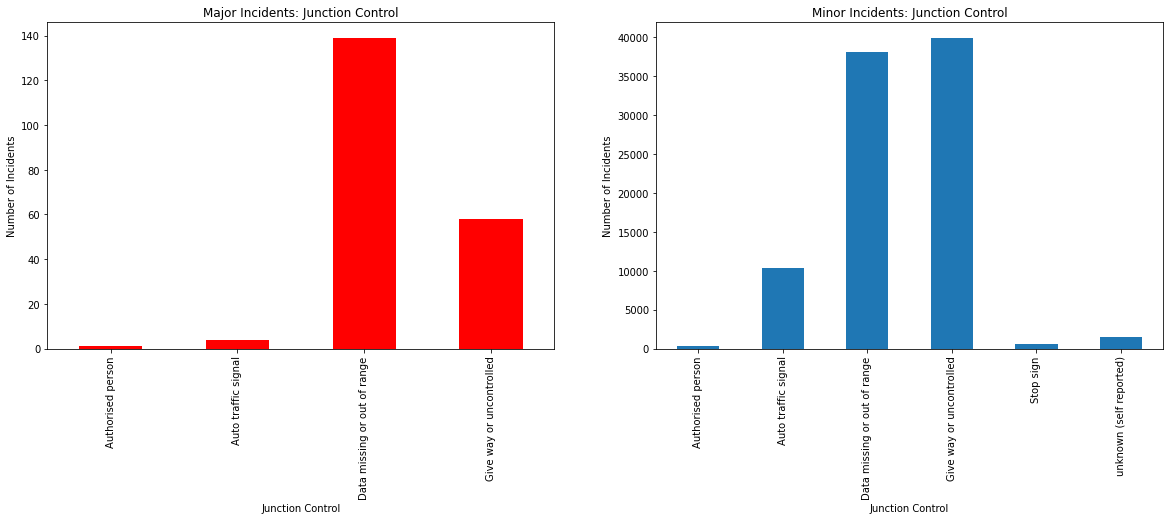

In [39]:
#plot of major incidents by junction control
plt.subplot(1,2,1)
major_incidents['junction_control'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: Junction Control')
plt.xlabel('Junction Control')
plt.ylabel('Number of Incidents')

#plot of minor incidents by junction control
plt.subplot(1,2,2)
minor_incidents['junction_control'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Junction Control')
plt.xlabel('Junction Control')
plt.ylabel('Number of Incidents')

plt.show()

<font size='3'><font color=red>**After an exhaustive analysis of the major incidents and other incidents, it was observed that there was no significant difference in the conditions sorrounding the incidents (major and others) except for the settlement area. We see that the rural area accounts for about 76% of the major incidents.**

<font size='3'>**Single carriage way roads also record the majority of incidents for both major and other incidents.This could be attributed to drivers not looking properly before overtaking among other reasons**

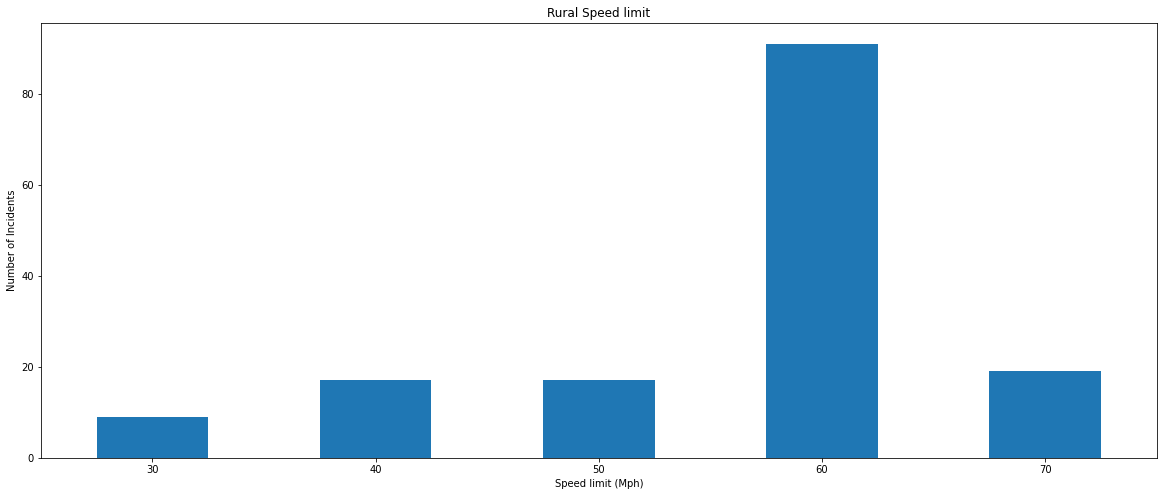

In [40]:
#plot of rurual area speed limit 
rural = major_incidents.copy()[major_incidents['urban_or_rural_area'] == 'Rural']

rural['speed_limit'].value_counts().sort_index().plot(kind='bar', figsize=(20,8))
plt.xticks(rotation=0)
plt.title('Rural Speed limit')
plt.ylabel('Number of Incidents')
plt.xlabel('Speed limit (Mph)')

plt.show()

# **RECOMMENDATIONS**

<font size='3'> From the above analysis, in order to reduce the major incidents, I would recommend that the planning team should focus their efforts:
- <font size='3'>**in the rural areas and effect proper planning to raise the standards of the raod systems;**
- <font size='3'>**on reducing the speed limit to 50Mph as speed is a known factor leading to accidents; and**
- <font size='3'>**on making medical facilities available in rural areas given that it records the higher number of major incidents. Research also shows that speed of medical response to an injured person can determine if someone would survive a car accident.**